In [1]:
import re
from operator import add

In [2]:
file_in1 = sc.textFile('eula\\eula.1028.txt')
'number of lines in file:%d'%file_in1.count()

'number of lines in file:112'

In [3]:
file_in_all = sc.textFile('eula\\eula*.txt')
'number of lines in all files:%d'%file_in_all.count()

'number of lines in all files:290'

In [4]:
chars = file_in_all.map(lambda l:len(l)).reduce(add)
'number of characters:%d'%chars


'number of characters:22315'

In [5]:
words = file_in_all.flatMap(lambda l:re.split('\W+',l.lower().strip()))
words.take(50)


[u'',
 u'you',
 u'have',
 u'received',
 u'the',
 u'software',
 u'as',
 u'part',
 u'of',
 u'the',
 u'visual',
 u'studio',
 u'9',
 u'0',
 u'beta',
 u'program',
 u'',
 u'the',
 u'terms',
 u'and',
 u'conditions',
 u'of',
 u'the',
 u'visual',
 u'studio',
 u'9',
 u'0',
 u'beta',
 u'1',
 u'license',
 u'agreement',
 u'applies',
 u'to',
 u'your',
 u'use',
 u'of',
 u'the',
 u'software',
 u'microsoft',
 u'pre',
 u'release',
 u'software',
 u'license',
 u'terms',
 u'microsoft',
 u'visual',
 u'studio',
 u'9',
 u'0',
 u'professional']

In [6]:
counts = file_in_all.flatMap(lambda l:l.split(" ")).map(lambda w:(w,1)).reduceByKey(lambda a,b:a+b)
counts.take(20)

[(u'', 293),
 (u'software.**', 2),
 (u'permits,', 3),
 (u'd\ufffd\ufffdabsence', 2),
 (u'13.', 2),
 (u'peut', 4),
 (u'LAWS,', 3),
 (u'POUR', 2),
 (u'contract,', 3),
 (u'design,', 2),
 (u'competition', 3),
 (u'pre-release', 4),
 (u'4.', 3),
 (u'consommateurs,', 2),
 (u'note:', 2),
 (u'ADDITIONAL', 3),
 (u'TO', 6),
 (u'quel', 2),
 (u'tort', 3),
 (u'does', 3)]

In [7]:
countsReverse = counts.map(lambda x:(x[1],x[0])).sortByKey(False)
countsReverse.take(50)

[(293, u''),
 (149, u'the'),
 (79, u'to'),
 (70, u'software'),
 (70, u'of'),
 (54, u'\ufffdE'),
 (53, u'and'),
 (51, u'you'),
 (45, u'or'),
 (39, u'may'),
 (36, u'de'),
 (36, u'any'),
 (35, u'for'),
 (34, u'in'),
 (33, u'not'),
 (33, u'this'),
 (30, u'your'),
 (28, u'Microsoft'),
 (28, u'agreement'),
 (27, u'You'),
 (27, u'laws'),
 (26, u'with'),
 (25, u'use'),
 (25, u'The'),
 (23, u'other'),
 (22, u'that'),
 (22, u'ou'),
 (22, u'rights'),
 (21, u'terms'),
 (20, u'a'),
 (19, u'software.'),
 (18, u'THE'),
 (18, u'services'),
 (18, u'YOU'),
 (18, u'third'),
 (17, u'This'),
 (17, u'on'),
 (17, u'is'),
 (16, u'AND'),
 (16, u'les'),
 (16, u'license'),
 (16, u'apply'),
 (15, u'limitation'),
 (15, u'MICROSOFT'),
 (15, u'OF'),
 (14, u'If'),
 (14, u'party'),
 (14, u'have'),
 (13, u'also'),
 (13, u'only')]

([<matplotlib.axis.YTick at 0xece94e0>,
 <a list of 10 Text yticklabel objects>)

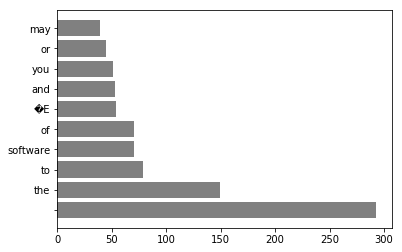

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
count = map(lambda x:x[0], countsReverse.take(10))
word = map(lambda x:x[1],countsReverse.take(10))
plt.barh(range(len(count)), count, color='gray')
plt.yticks(range(len(count)),word)